In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,KFold, cross_validate

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [2]:
import matplotlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

In [8]:
plt.style.use('fivethirtyeight')

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("data/final-clean-data/predictor-data-final.csv")
df.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,FloorRise,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,Facilities Categories,price
0,House/Villa,Sector 15 Chandigarh,Chandigarh,18000.0,7,7,4,0,1,0,0,0,North-West,0,Low-Rise,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Yes,Yes,Standard,28.0


### Custom Graph Function

In [5]:
# For Numerical Columns
def hist_box_scat_graph(columns_list,df,target_column='price'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot scatter plot.
    '''
    for col in columns_list:
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.histplot(x = df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])
        
        plt.subplot(1,3,3)
        sns.scatterplot(x=df[col],y=df[target_column])
        
        plt.show()
        plt.close()

In [6]:
### For Categorical Columns

def bar_box_pie_plot(cat_col_list,df,target_column = 'price'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot boxplot.
    '''
    for col in cat_col_list:
        temp = df[col].value_counts().reset_index()
        temp.columns = [col, 'Count']
        
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.barplot(temp,x=col,y='Count')
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,2)
        sns.boxplot(df,x=col,y = target_column)
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,3)
        plt.pie(x = temp['Count'],autopct='%.2f',labels=temp[col])
        plt.show()
        plt.close()

### Exploratory Data Analysis (EDA)

#### Target Column

Skewness: 6.4970345048668


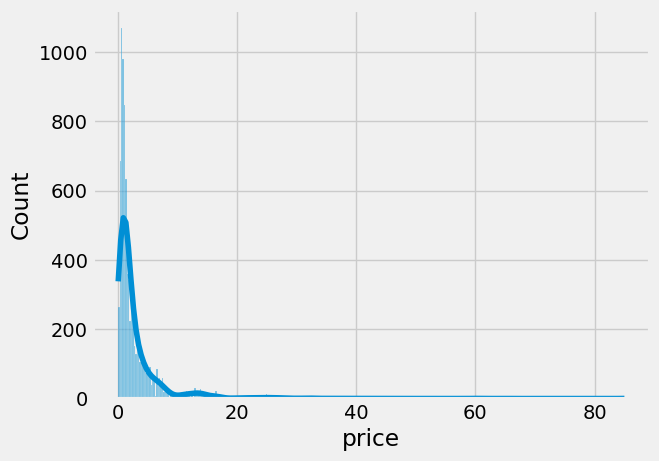

In [9]:
print(f"Skewness: {df['price'].skew() }")
sns.histplot(x = df['price'],kde=True)
plt.show()

Skewness: 1.3348870843976384


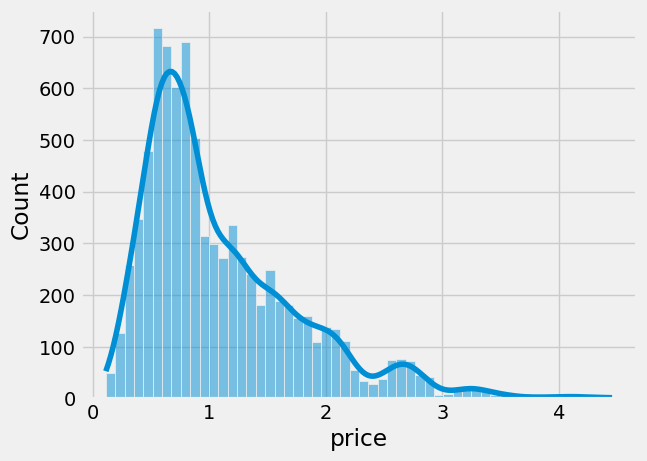

In [10]:
# Log Transformation
print(f"Skewness: { (np.log1p(df['price'])).skew() }")
sns.histplot(x = np.log1p(df['price']),kde=True)
plt.show()

In [11]:
df['price'] = np.log1p(df['price'])

#### Numerical Column

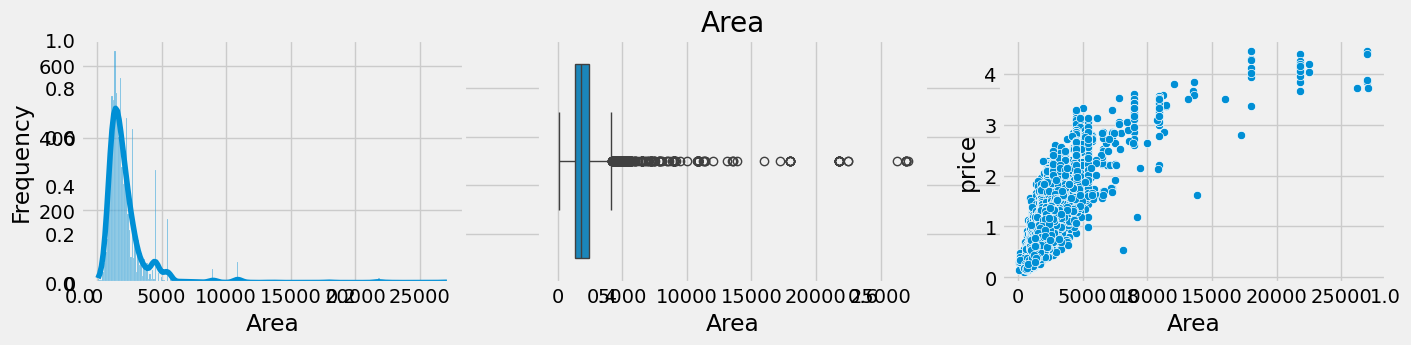

In [12]:
hist_box_scat_graph(['Area'],df)

Skewness: 0.6313019105542804


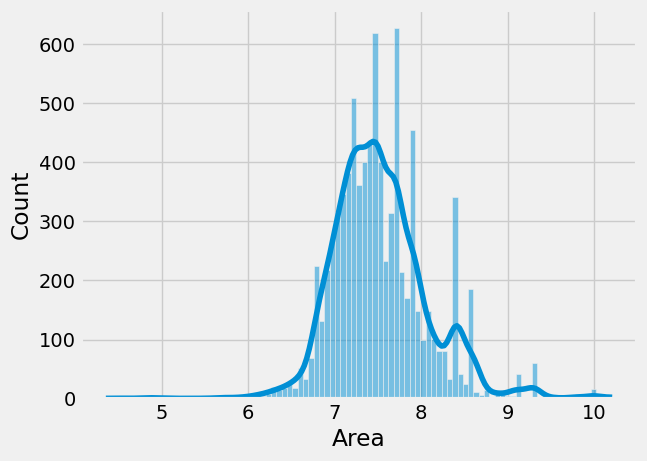

In [13]:
# Log Transformation
print(f"Skewness: { (np.log(df['Area'])).skew() }")
sns.histplot(x = np.log(df['Area']),kde=True)
plt.show()

In [14]:
df['Area'] = np.log(df['Area'])

<Axes: xlabel='Area', ylabel='price'>

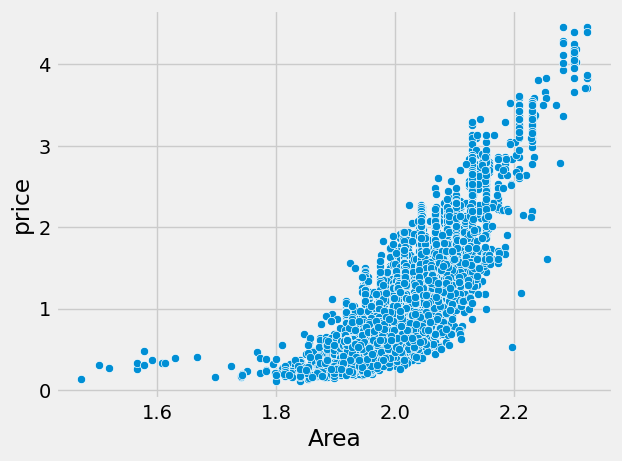

In [15]:
sns.scatterplot(x = np.log(df['Area']), y = df['price'])

Strong Linear Relation of Area with Price Column

#### Categorical Columns

In [16]:
cat_cols = list(df.columns)
cat_cols.remove('Area')
cat_cols.remove('price')

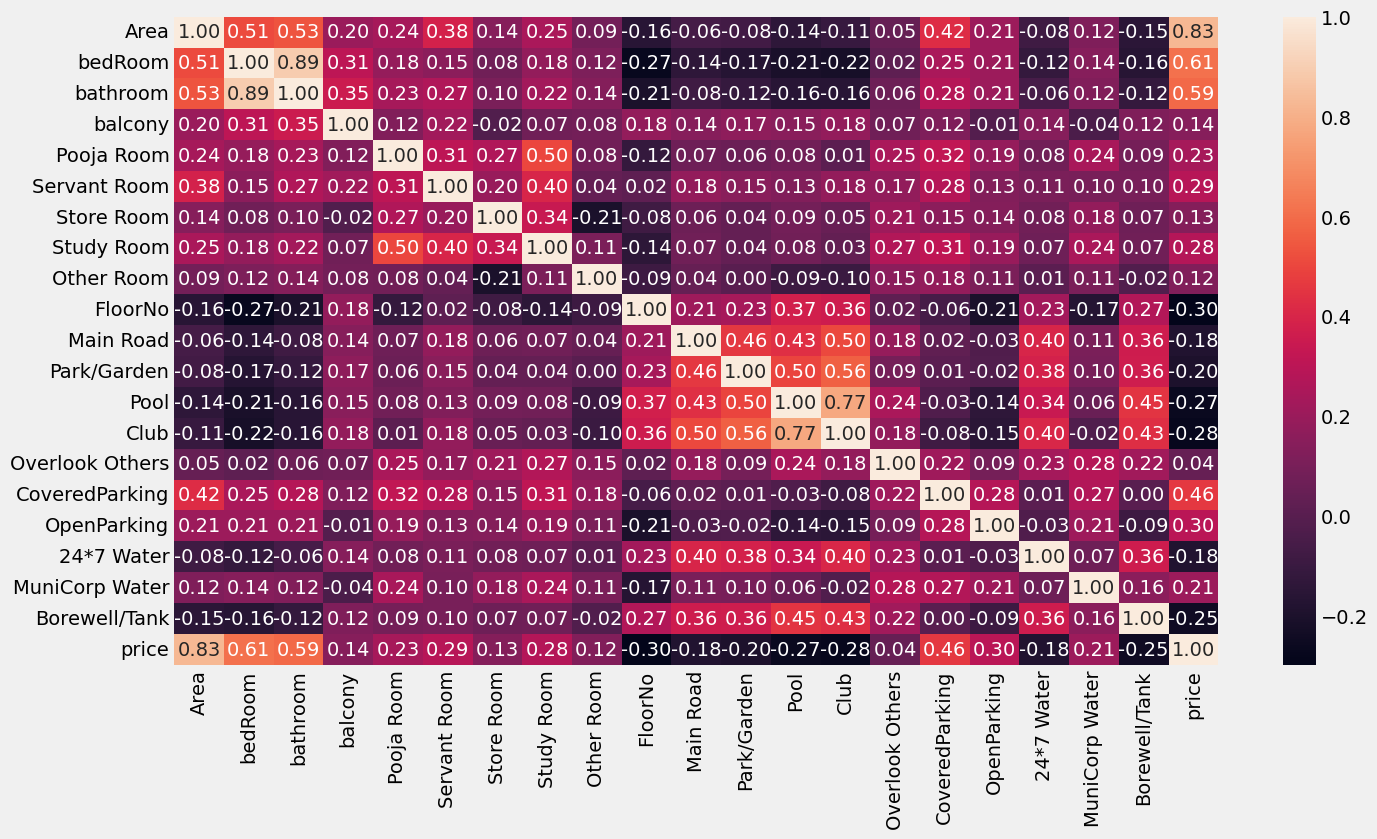

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()

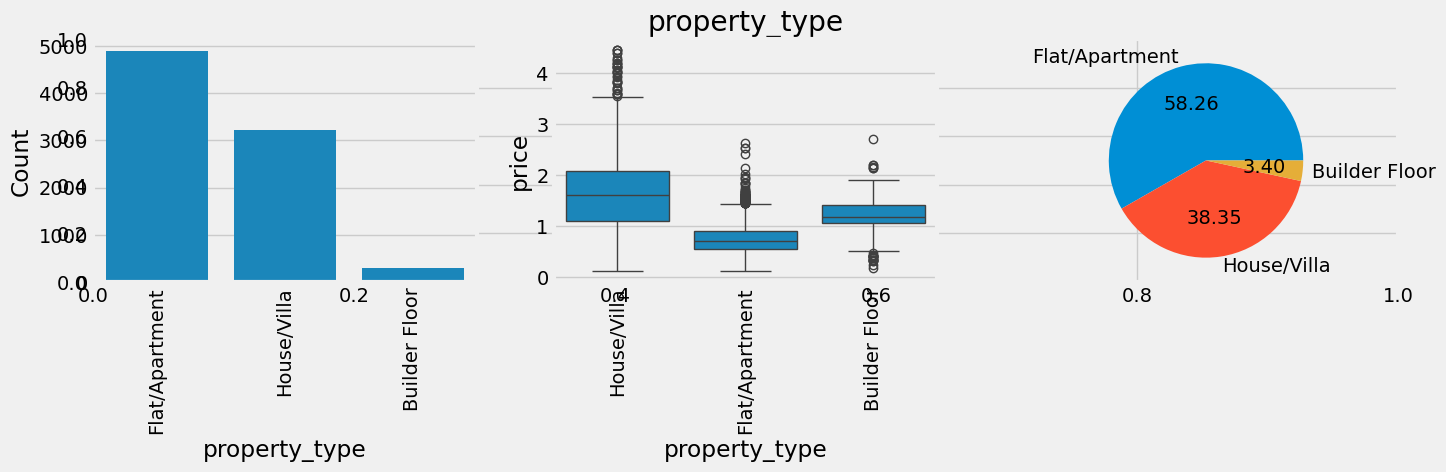

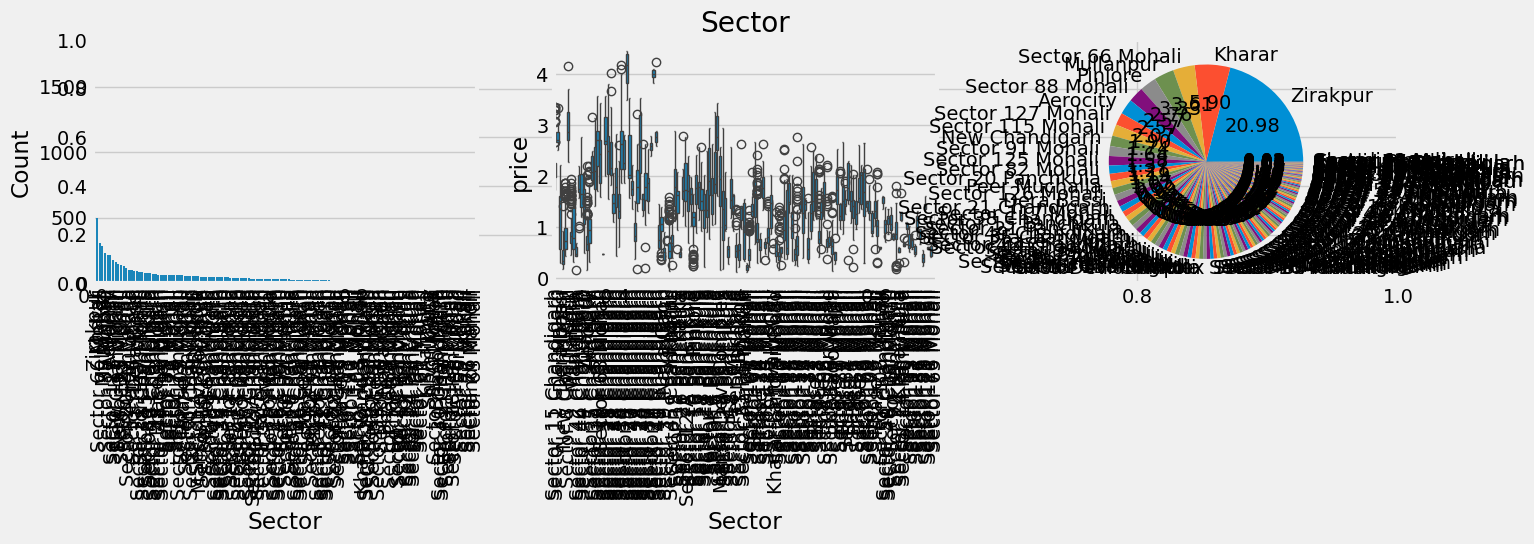

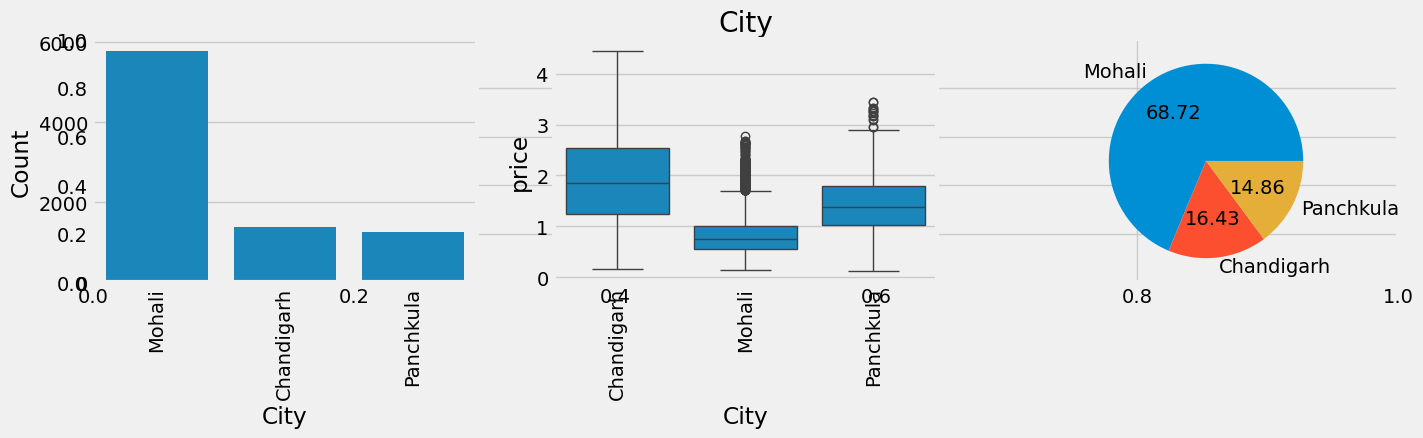

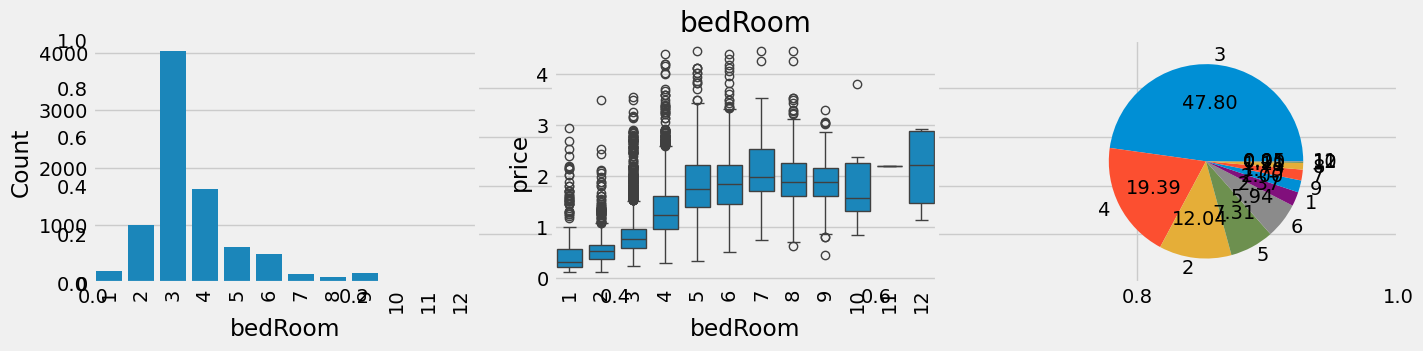

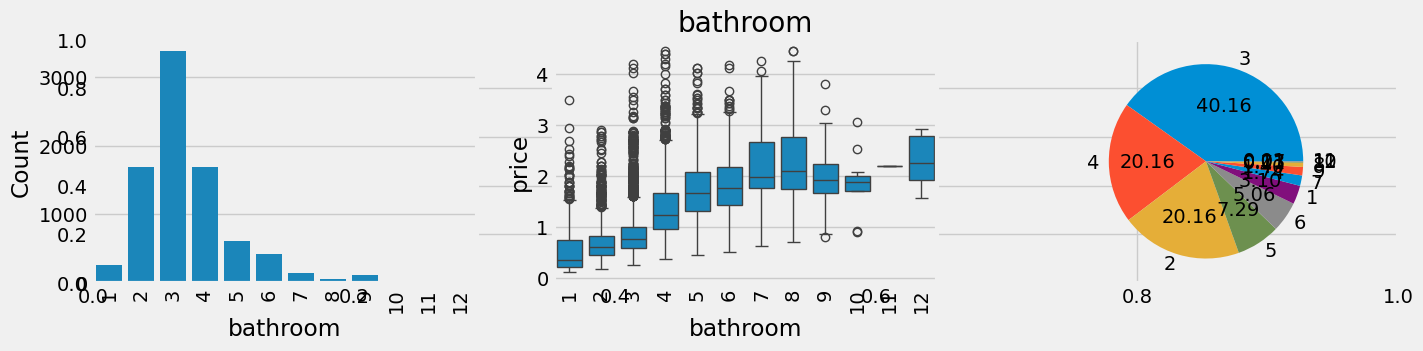

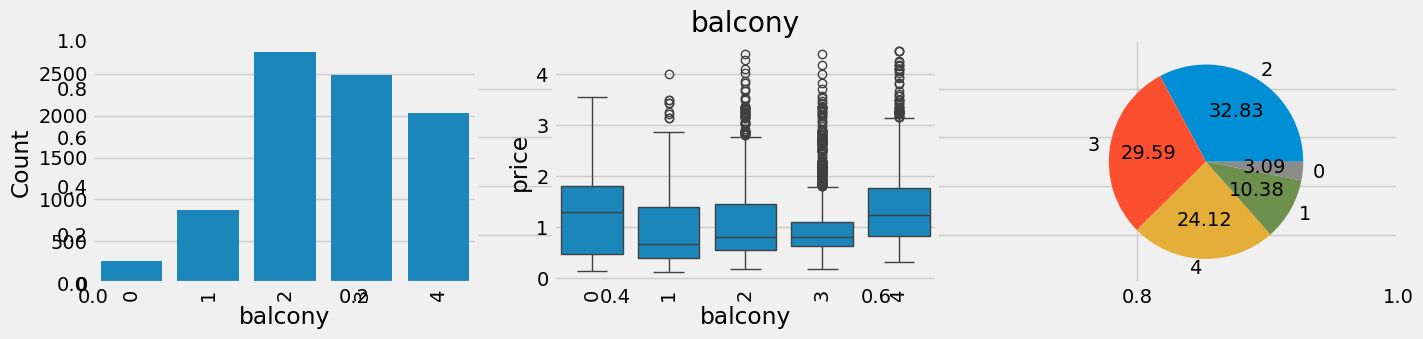

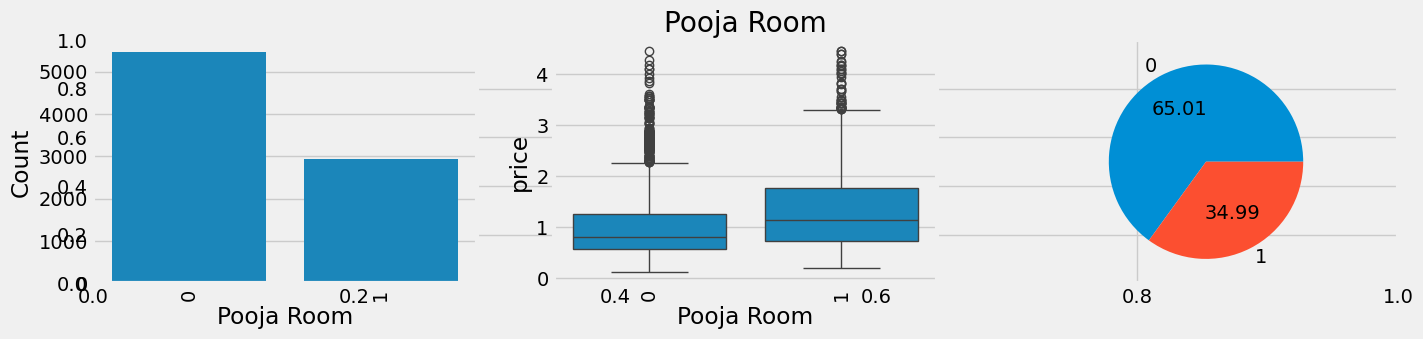

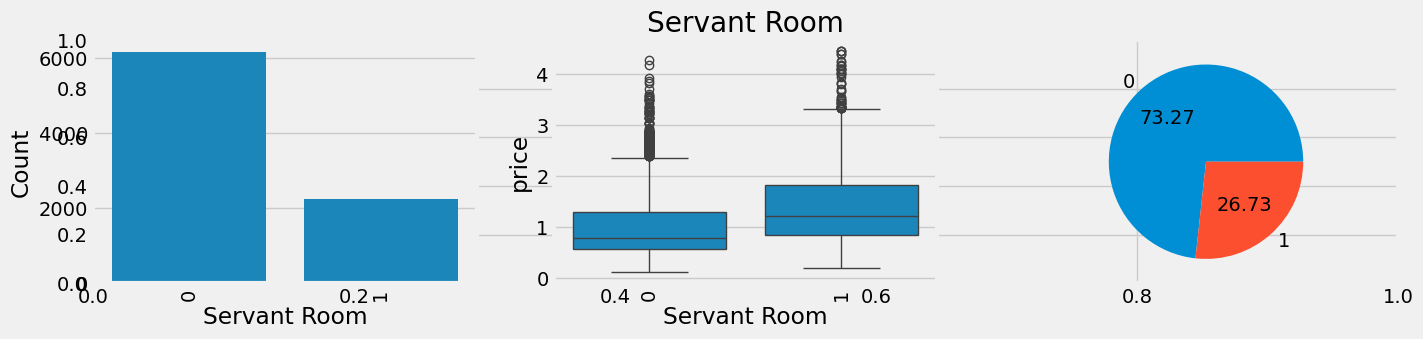

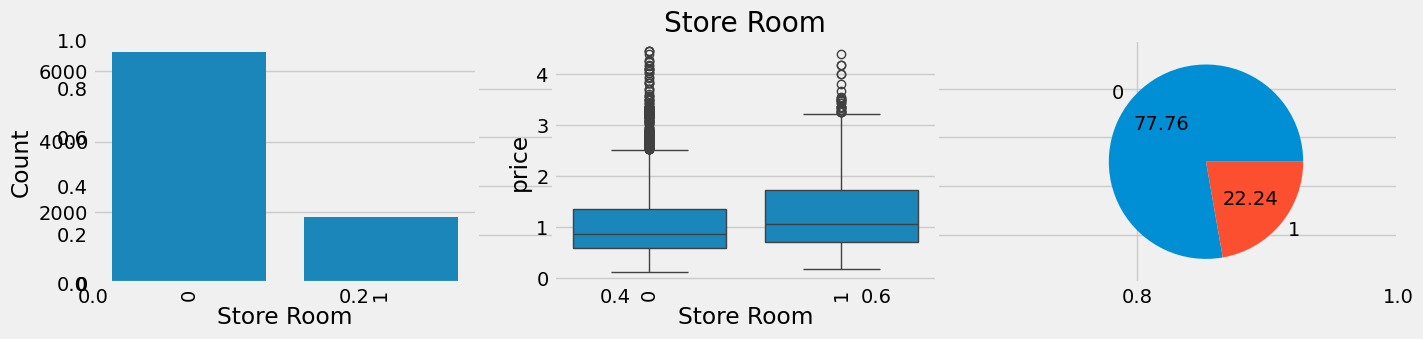

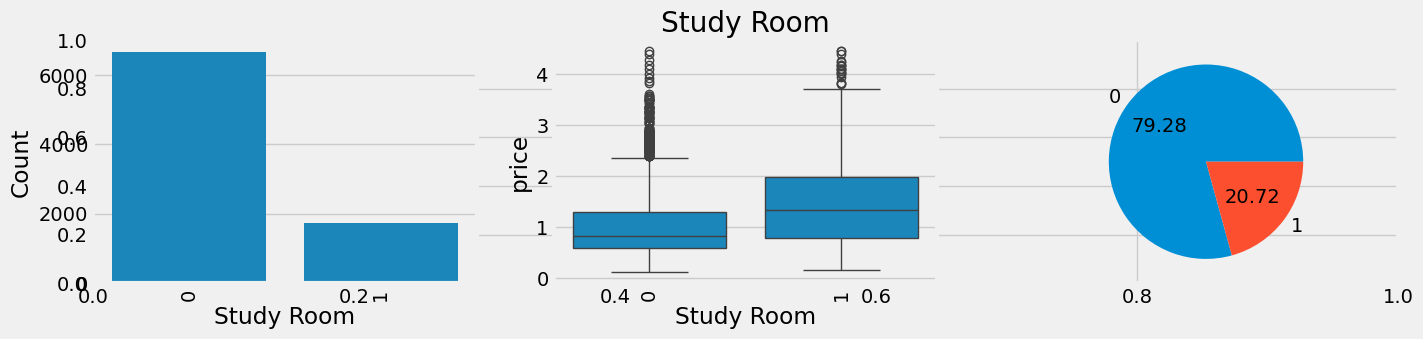

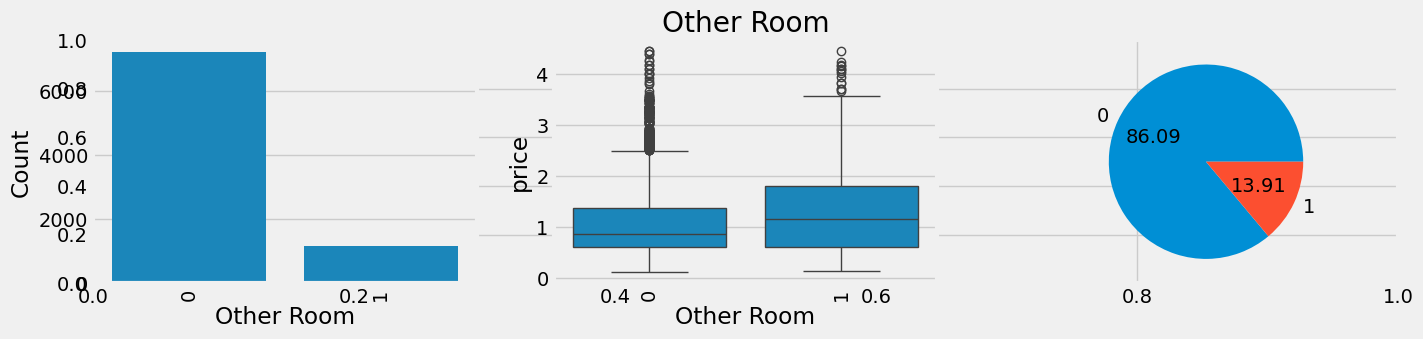

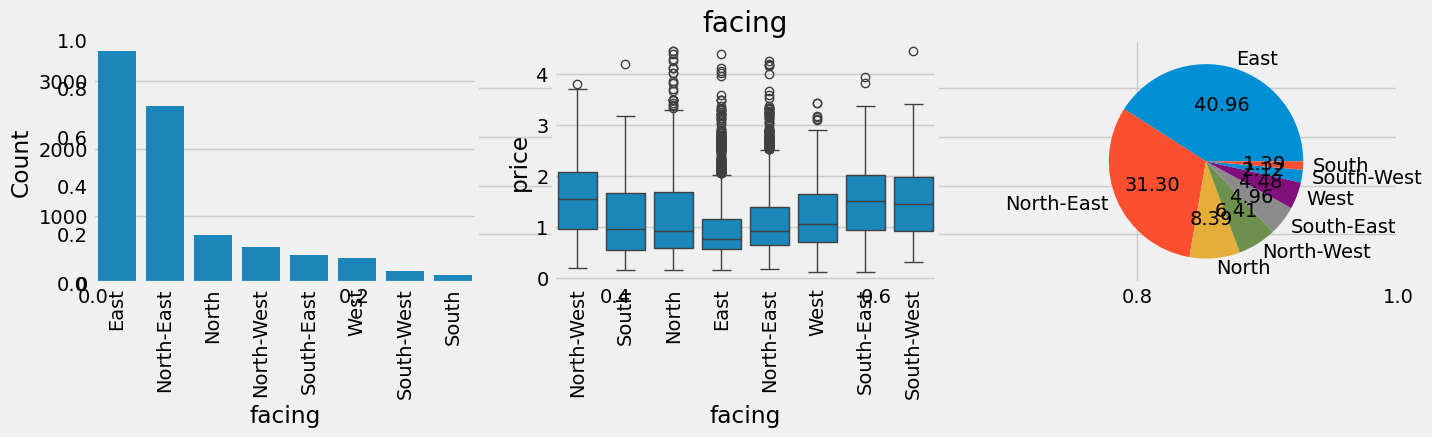

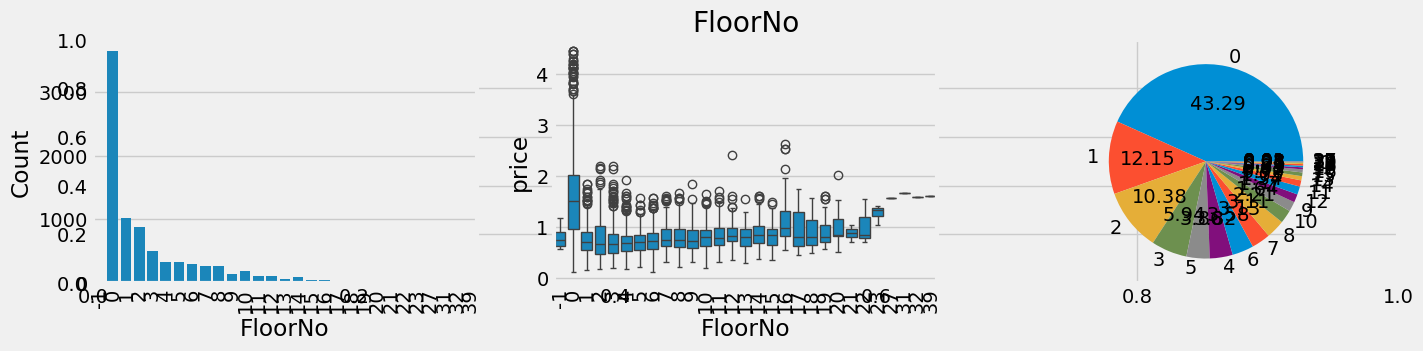

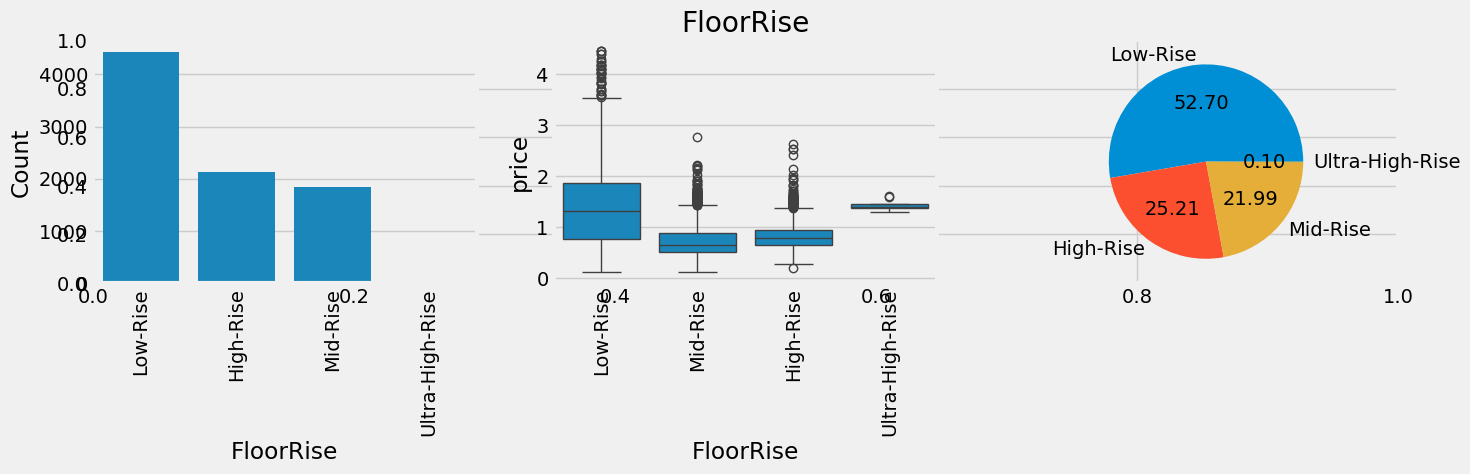

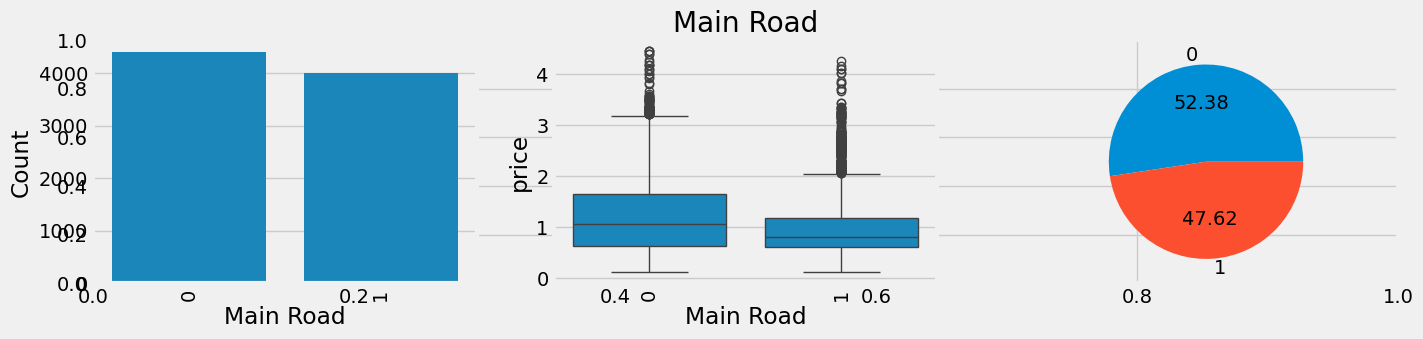

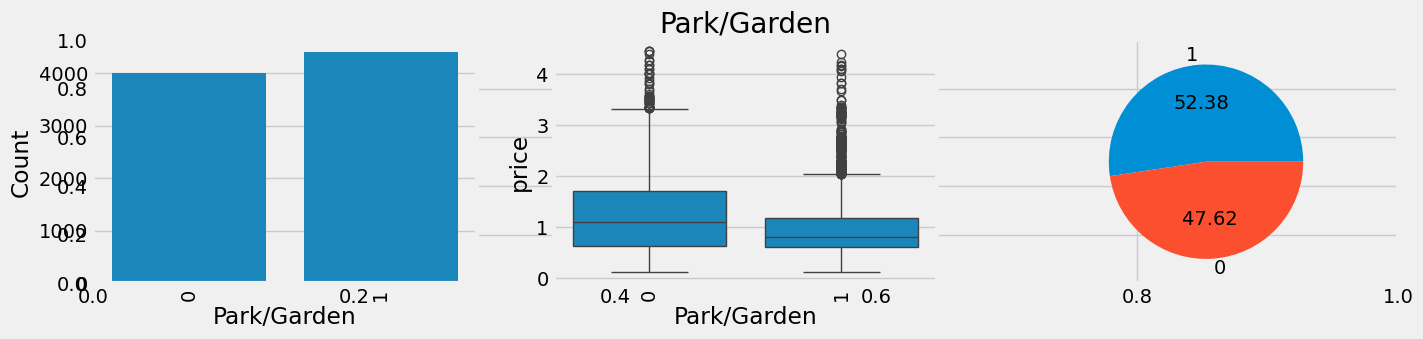

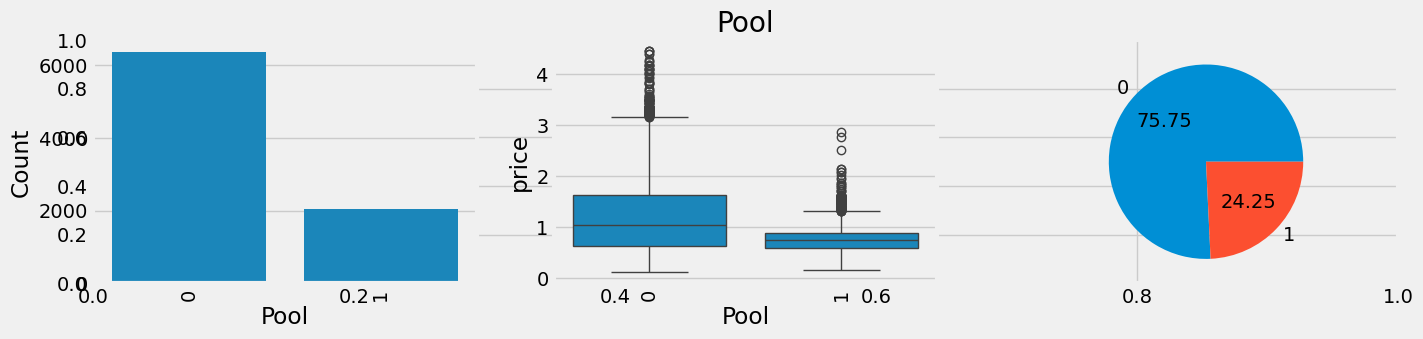

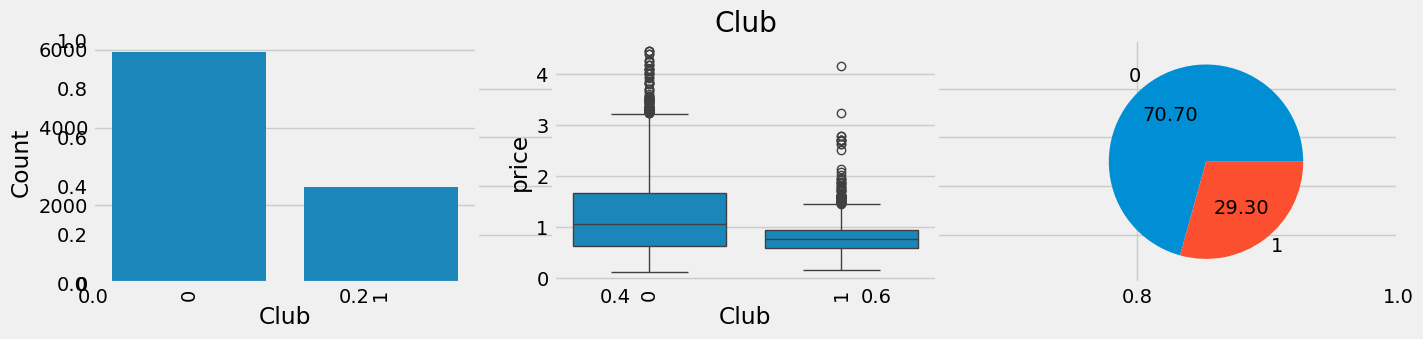

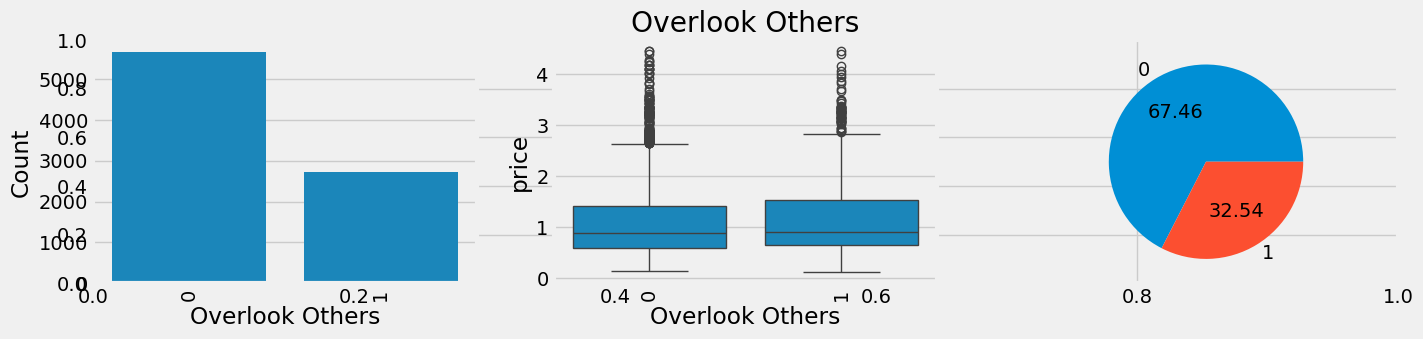

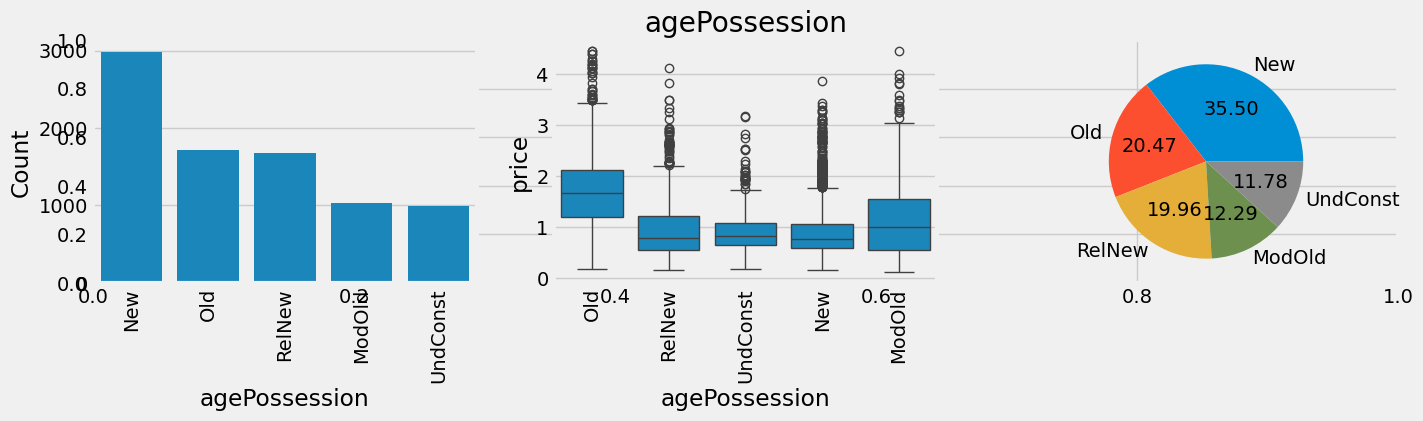

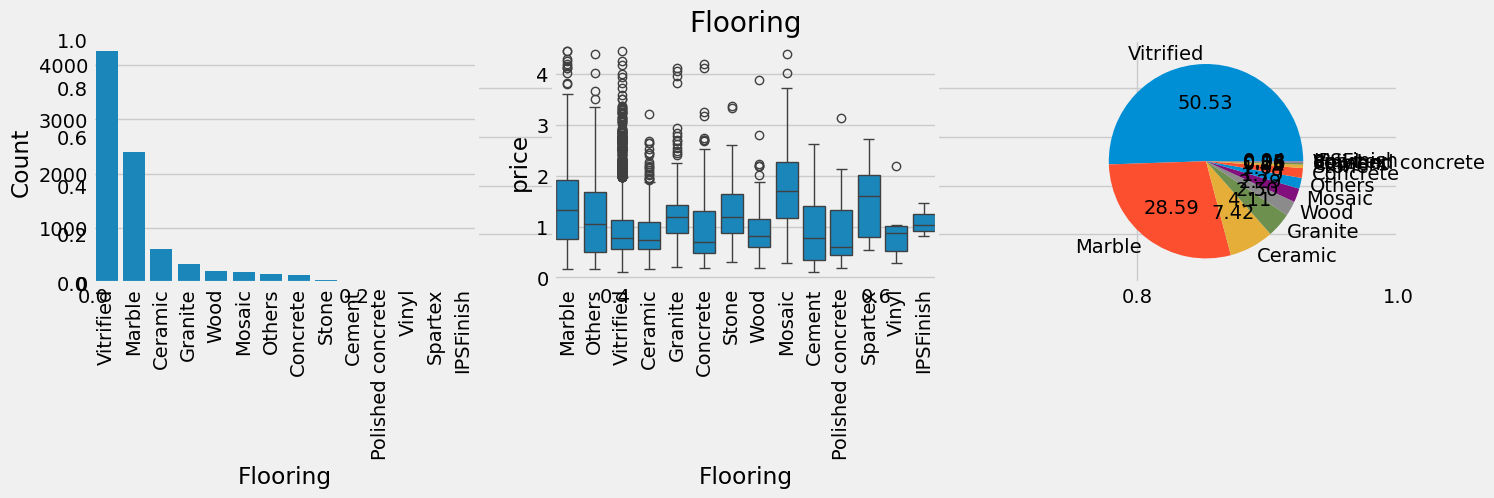

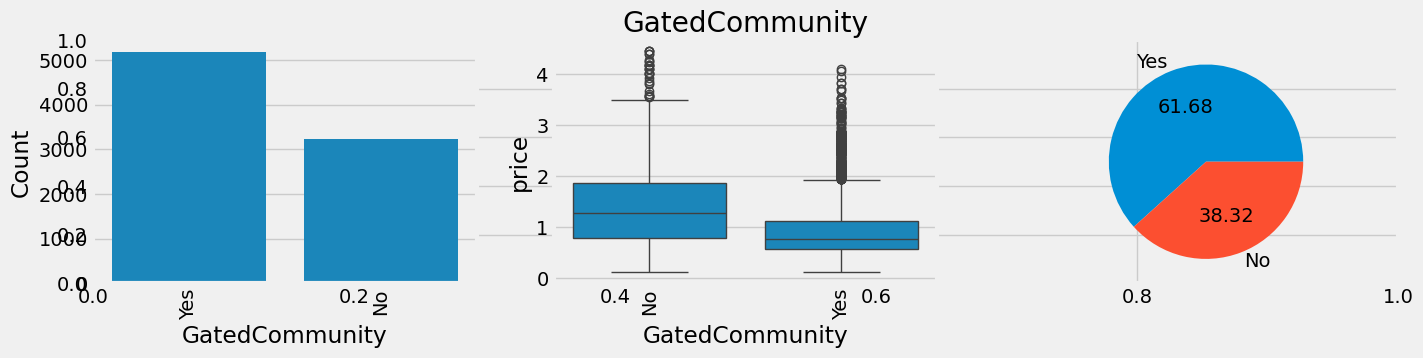

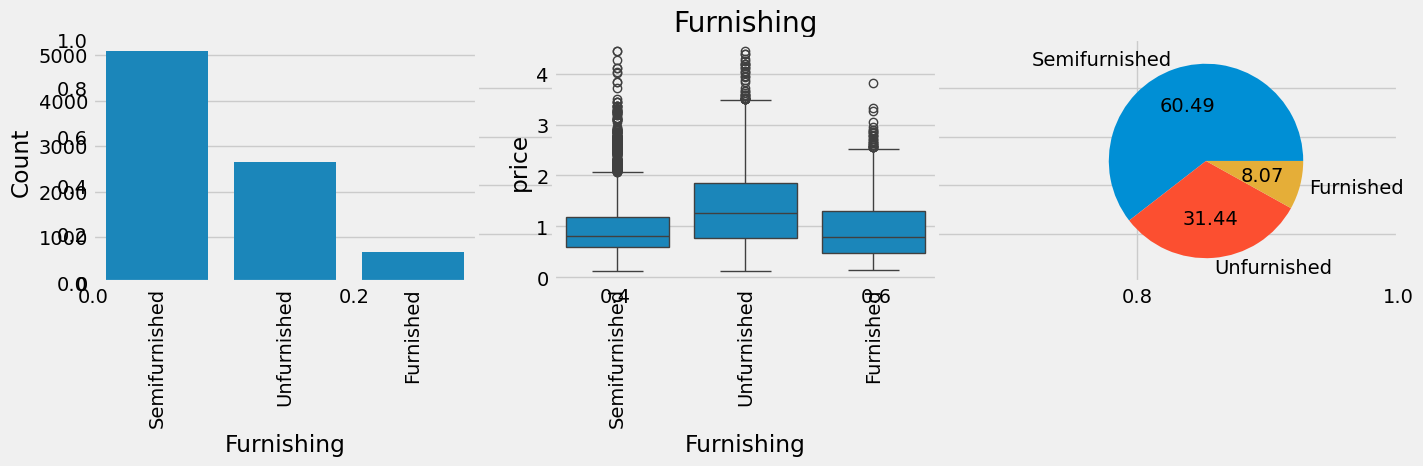

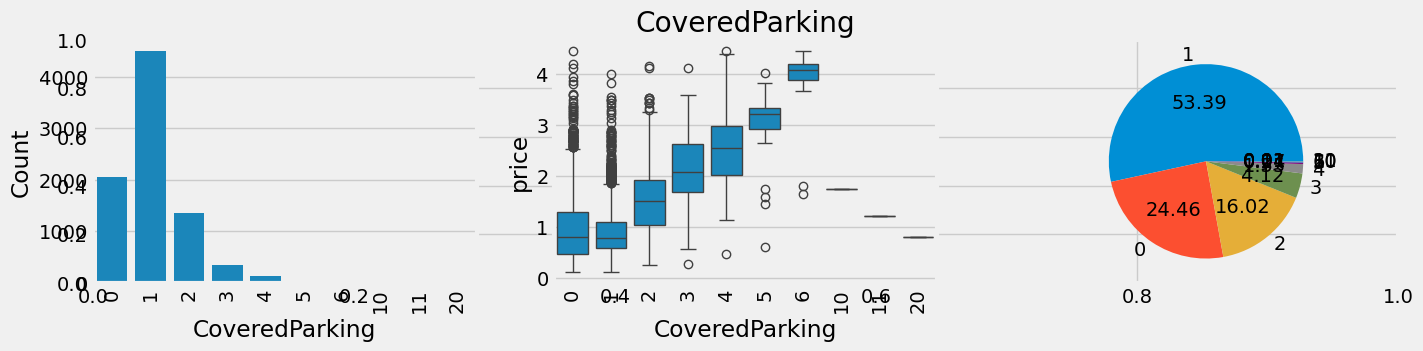

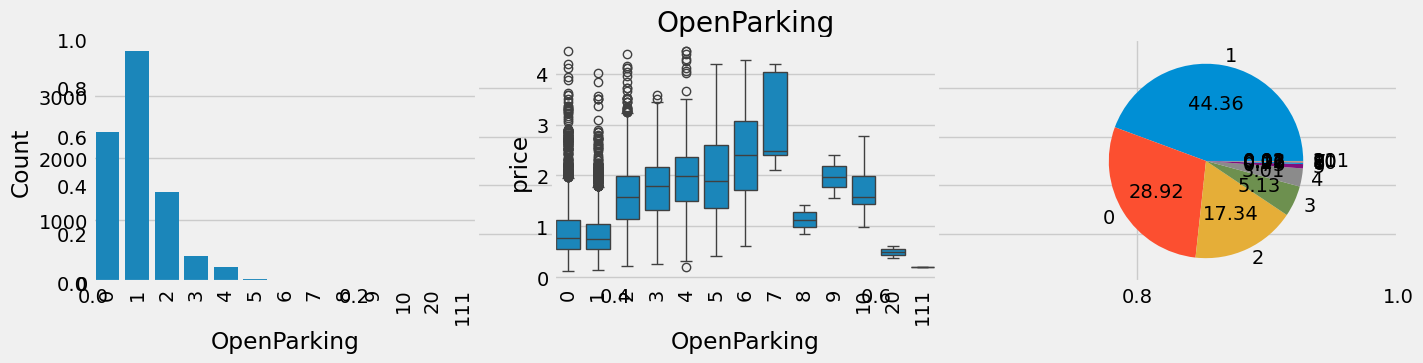

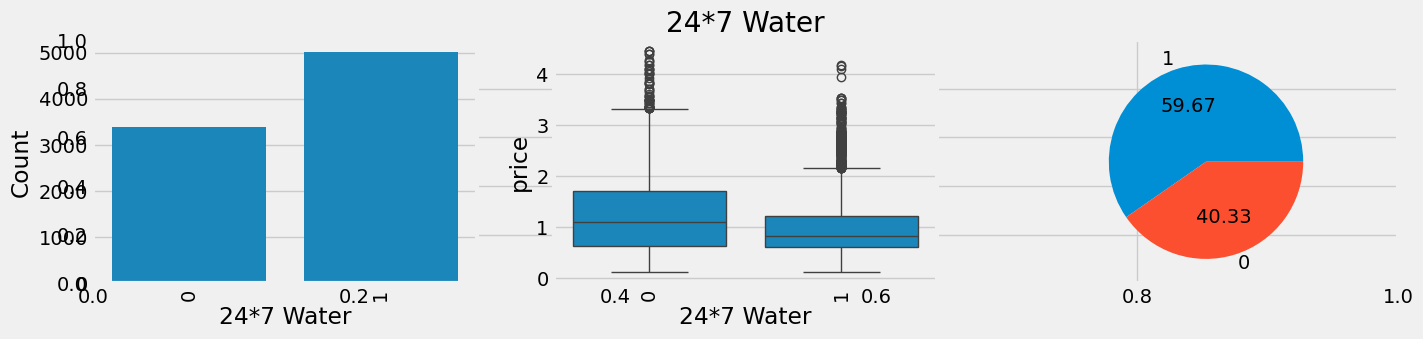

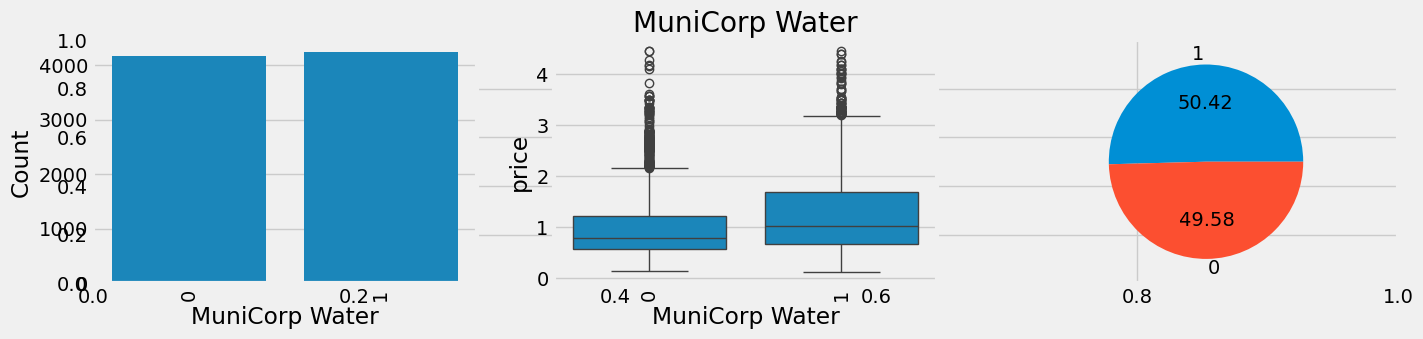

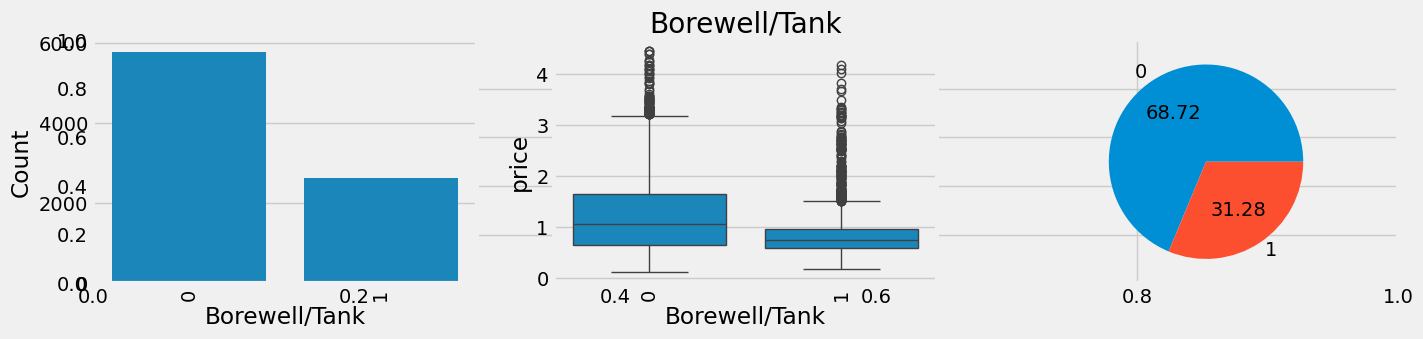

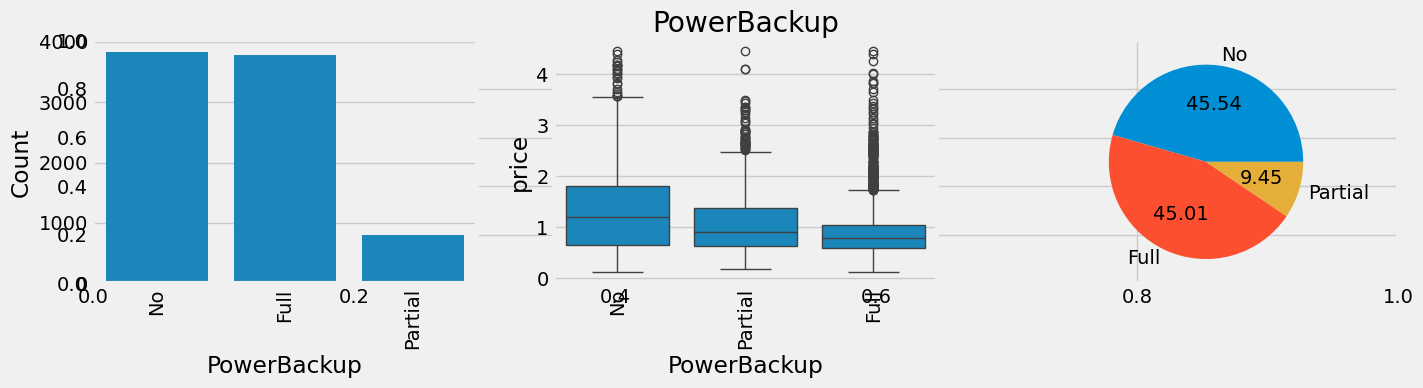

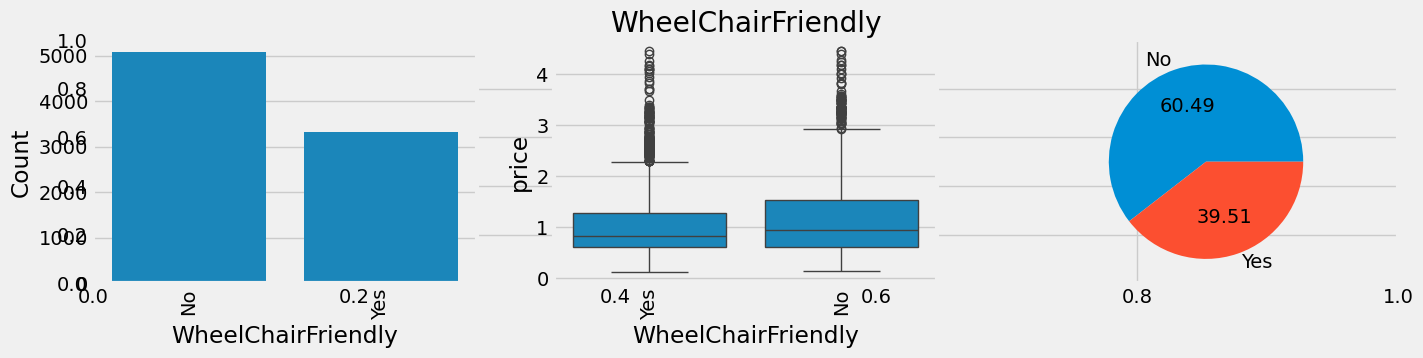

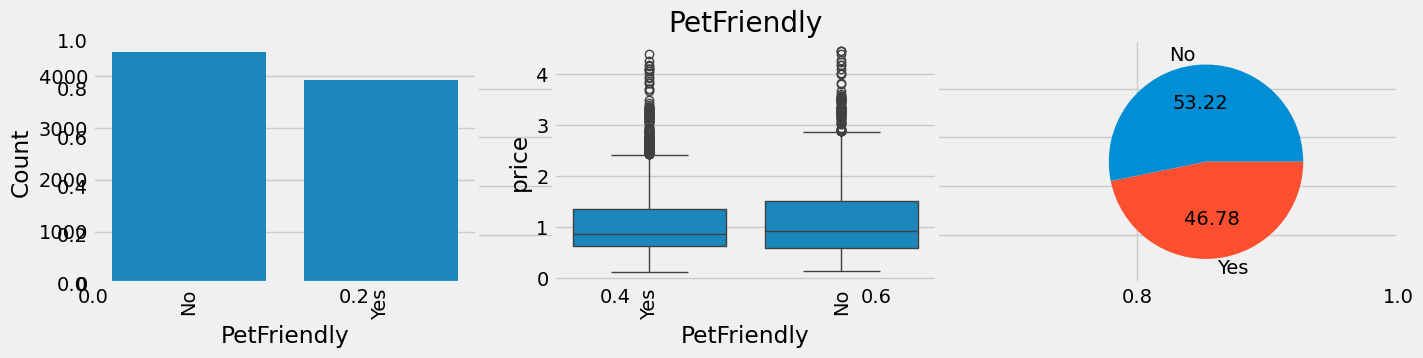

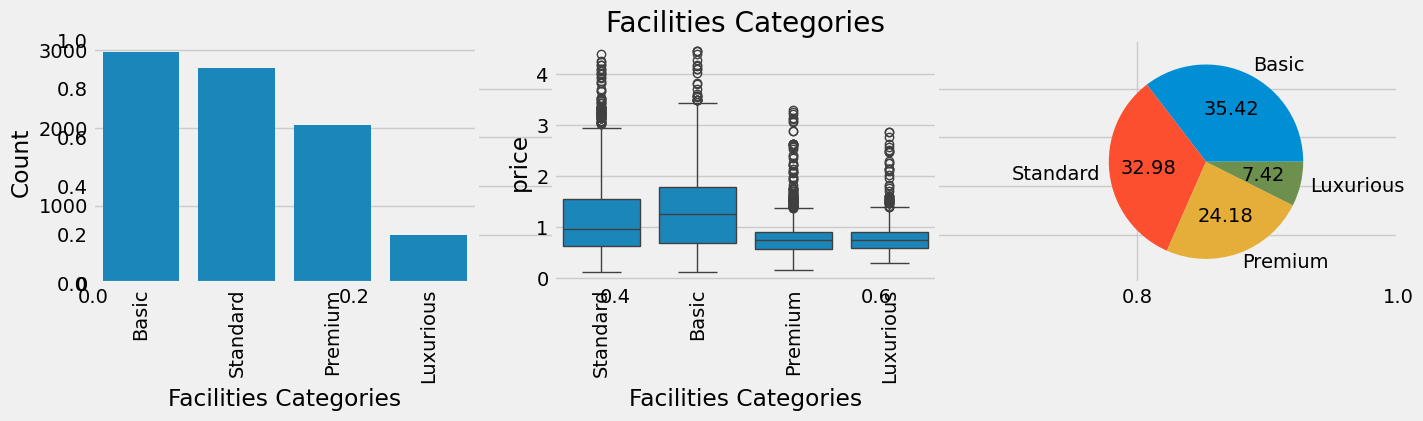

In [17]:
bar_box_pie_plot(cat_cols,df)

In [19]:
# Sector
len(df['Sector'].value_counts().index)

144

#### EDA Analysis

- `property_type`:  
There are Three types of property types in data. Flats/Appartement comprises the data the most about 58%, Then Independent Houses comprising fo 38%, Builder are only 3.40% of data.
- `Sector`:  
This is high cardinality column with 144 categories. This is a very important column as different sector have different prices. This cardinality may affect the accuracy of model. We have to handle it carefully by using Tree based model or other methods like dimensionality reduction.
- `City`:  
This dataset is of Chandigarh Tricity Region comprising of three main cities as Mohali(68%), Chandigarh(16%),Panchkula(14%).
- `bedRoom`,`bathRoom`:  
bedRoom column shows some form of Linear Relation with price column. Similar is the case with bathRoom. But both columns have extreme multicollinearity of aroud 0.89. This will not affect the model but impact its interpretability.
- `balcony`:  
Dont See much of a relation with price column. (Needs Further Investigation.)
- `Pooja Room`,`Servant Room`,`Store Room`,`Study Room`,`Study Room`:  
These column show some form of Linear Relation. But Most of These column are heavily imbalanced. This might be problematic. Study Room, Other Room are extremely imbalanced may cause problems.
- `Facing`:  
Imbalanced with most datapoints in East or North-East. (Need Further investigation)
- `FloorNo`,`FloorRise`:  
In FloorNo, zeros represent independent Floors thats why they are in large quantities. FloorRise show some form of Relation with Price.
- `Main Road`,`Park/Garden`,`Club`,`Overlook Others`,`Pool`:  
These columns dont seem to be having any relation with price columns. Might drop them after further investigation.
- `agePossession`:   
Couldnt tell about relation with price column. But this column is quite balanced.
- `Flooring`:   
Quite Imbalanced category. 2 categories ('Marble','Vitrified') comprise of 80% of data.
- `Furnishing`:   
Quite Imbalanced data. May cause problems in predictions. Semifurnished consists of 60% data, with Unfurnished being at 31%, Furnished have only 8% data.
- `CoveredParking`,`OpenParking`:
These Columns seem to have good linear relation with price column.
- `WheelChairFriendly`,`PetFriendly`:
These columns seems to be useless.

Rest of the columns will be investigated further under Feature Selection.

### Random Forest Feature Importance

Before This We First need to convert our data to number. Here I will use ordinal Encoding.

In [95]:
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

In [25]:
temp_df = X.copy()

In [26]:
odn_cols_list = ['property_type','Sector','City','facing','FloorRise','agePossession','Flooring','GatedCommunity','Furnishing','PowerBackup','WheelChairFriendly','PetFriendly','Facilities Categories'] 

In [63]:
odn_enc = ColumnTransformer(
    [('odn_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),odn_cols_list)],
    remainder= 'drop'
)

In [37]:
enc_df = odn_enc.fit_transform(temp_df)
temp_df[odn_cols_list] = pd.DataFrame(enc_df,columns=odn_cols_list)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(temp_df,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(temp_df,y)
fi = rf.feature_importances_

In [50]:
fi_df = pd.DataFrame(list(zip(X.columns,fi *100))).sort_values(by=1,ascending=False).reset_index(drop=True)
fi_df

,0,1
0,Area,74.590216
1,property_type,6.405561
2,bedRoom,4.910190
3,City,4.057307
4,Sector,4.018762
5,bathroom,1.171589
6,FloorRise,0.719422
7,FloorNo,0.697458
8,agePossession,0.416435
9,OpenParking,0.331054


#### Base Model

In [64]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'xgboost':XGBRegressor(),
    'catboost':CatBoostRegressor(verbose = False)
}

In [88]:
odn_cols_list = ['property_type','Sector','City','facing','FloorRise',
                     'agePossession','Flooring','GatedCommunity',
                     'Furnishing','PowerBackup','WheelChairFriendly',
                     'PetFriendly','Facilities Categories'] 
odn_enc = ColumnTransformer(
                    [('odn_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),odn_cols_list)],
                     remainder= 'passthrough'
              )

In [72]:
def scorer(model_name, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = ['r2', 'neg_mean_absolute_error']

    pipeline = Pipeline(
                    [('encoding',odn_enc),
                     ('scaler',StandardScaler()),
                     ('model',model)]    
                )
    
    model_scores =  cross_validate(pipeline, X, y, cv=kf, scoring=scores,return_train_score = True)
    return model_name,round(np.mean(model_scores['test_r2']),4),round(-np.mean(model_scores['test_neg_mean_absolute_error']),4)

In [73]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [76]:
results = pd.DataFrame(model_output,columns = ['Model','R2','MAE(Cr)'])
results['MAE(Cr)'] = np.expm1(results['MAE(Cr)'])
results.sort_values(by = 'R2',ascending=False)

,Model,R2,MAE(Cr)
10,catboost,0.9610,0.096146
9,xgboost,0.9577,0.097681
6,extra trees,0.9521,0.101750
5,random forest,0.9519,0.099879
7,gradient boosting,0.9375,0.130884
1,svr,0.9249,0.140766
4,decision tree,0.9078,0.133829
8,adaboost,0.8606,0.223359
0,linear_reg,0.8304,0.234912
2,ridge,0.8304,0.234912


As Expected the Tree Based Models are Performing the best on our model With Catboost havig the best scores of around 0.96 R2 score

Lets reduce these Some Feature and check Model Performance

### Feature Selection

In [96]:
cols_drop = ['Pooja Room','Servant Room','Study Room','Store Room','Other Room','Main Road','Park/Garden','Club','Overlook Others','Pool','PetFriendly','WheelChairFriendly']

In [98]:
X.drop(columns = cols_drop,inplace = True)

In [99]:
for i in cols_drop:
    if i in odn_cols_list:
        odn_cols_list.remove(i)

In [100]:
model_output_sel = []
for model_name,model in model_dict.items():
    model_output_sel.append(scorer(model_name, model))

In [101]:
results_sel = pd.DataFrame(model_output_sel,columns = ['Model','R2','MAE(Cr)'])
results_sel['MAE(Cr)'] = np.expm1(results_sel['MAE(Cr)'])
results_sel.sort_values(by = 'R2',ascending=False)

,Model,R2,MAE(Cr)
10,catboost,0.9604,0.096913
9,xgboost,0.9574,0.097352
6,extra trees,0.9529,0.100649
5,random forest,0.9518,0.099659
7,gradient boosting,0.9370,0.131111
1,svr,0.9251,0.139284
4,decision tree,0.9081,0.132922
8,adaboost,0.8627,0.220426
0,linear_reg,0.8273,0.237261
2,ridge,0.8273,0.237261


There is is very less performance loss from removing above features as we can see from metrics.

In [102]:
X.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,facing,FloorNo,FloorRise,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,Facilities Categories
0,House/Villa,Sector 15 Chandigarh,Chandigarh,9.798127,7,7,4,North-West,0,Low-Rise,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Standard


ThereFore, Above Column will be the main columns for our model

In [104]:
main_columns = X.columns
main_columns

Index(['property_type', 'Sector', 'City', 'Area', 'bedRoom', 'bathroom',
       'balcony', 'facing', 'FloorNo', 'FloorRise', 'agePossession',
       'Flooring', 'GatedCommunity', 'Furnishing', 'CoveredParking',
       'OpenParking', '24*7 Water', 'MuniCorp Water', 'Borewell/Tank',
       'PowerBackup', 'Facilities Categories'],
      dtype='object')